# Absence hranic států s chybějícími hodnotami

Time difference of 0.52742 secs


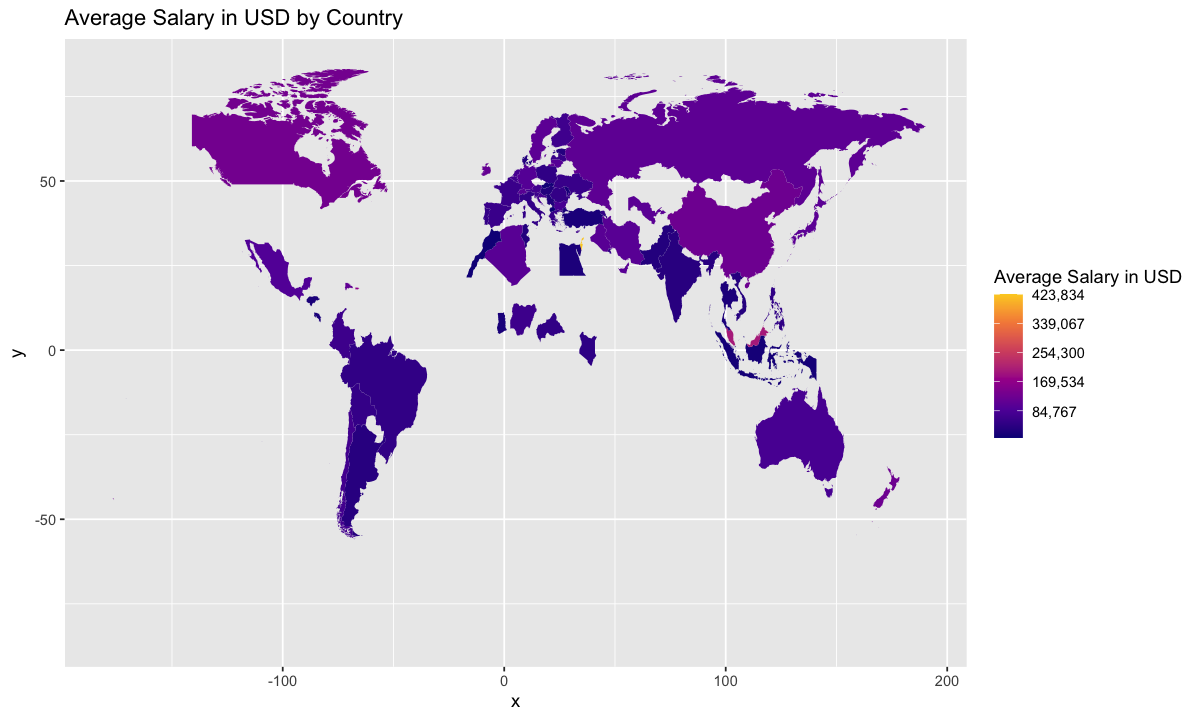

In [5]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(countrycode)
library(maps)  # for the 'world' dataset
library(viridis)  # for the 'plasma' color scheme

# load data stored in a CSV file
df <- read.csv('data/ds_salaries.csv')

# Convert two-letter country codes to country names
df$employee_residence <- countrycode(df$employee_residence, 'iso2c', 'country.name')

# Group by 'employee_residence' and calculate the average 'salary_in_usd'
avg_salaries <- aggregate(salary_in_usd ~ employee_residence, df, mean)

# Replace NA values with 0
avg_salaries[is.na(avg_salaries)] <- 0

# Create a dataframe with country codes and average salaries
country_data <- data.frame(
  region = avg_salaries$employee_residence,
  salary_in_usd = avg_salaries$salary_in_usd
)

# Get the world map data
world_map <- map_data('world')

# Set the plot size 
options(repr.plot.width=10, repr.plot.height=6)

# Create a choropleth map
ggplot() +
  geom_map(data=country_data, map=world_map, aes(map_id=region, fill=salary_in_usd)) +
  expand_limits(x = world_map$long, y = world_map$lat) +
  scale_fill_viridis_c(name="Average Salary in USD", labels=scales::comma_format(), 
                        breaks=seq(0, max(country_data$salary_in_usd), length.out=6), 
                        option="plasma", direction=1, end=0.9, na.value="grey50") +
  labs(title="Average Salary in USD by Country") 

end.time <- Sys.time()
print(end.time - start.time)

# Hranice států s chybějícími hodnotami

Time difference of 0.6513729 secs


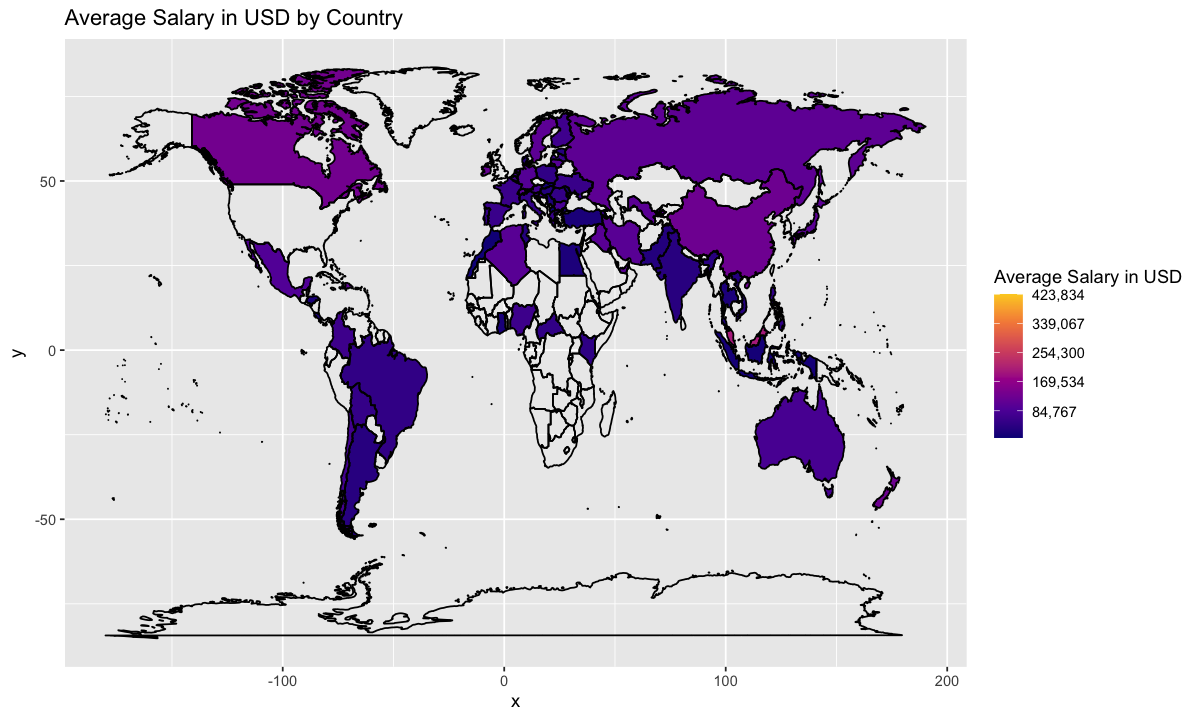

In [4]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(countrycode)
library(maps)  # for the 'world' dataset
library(viridis)  # for the 'plasma' color scheme

# load data stored in a CSV file
df <- read.csv('data/ds_salaries.csv')

# Convert two-letter country codes to country names
df$employee_residence <- countrycode(df$employee_residence, 'iso2c', 'country.name')

# Group by 'employee_residence' and calculate the average 'salary_in_usd'
avg_salaries <- aggregate(salary_in_usd ~ employee_residence, df, mean)

# Replace NA values with 0
avg_salaries[is.na(avg_salaries)] <- 0

# Create a dataframe with country codes and average salaries
country_data <- data.frame(
  region = avg_salaries$employee_residence,
  salary_in_usd = avg_salaries$salary_in_usd
)

# Get the world map data
world_map <- map_data('world')

# Set the plot size 
options(repr.plot.width=10, repr.plot.height=6)

# Create a choropleth map
ggplot() +
  geom_map(data=country_data, map=world_map, aes(map_id=region, fill=salary_in_usd)) +
  geom_map(data=world_map, map=world_map, aes(map_id=region), fill=NA, color="black") +
  expand_limits(x = world_map$long, y = world_map$lat) +
  scale_fill_viridis_c(name="Average Salary in USD", labels=scales::comma_format(), 
                        breaks=seq(0, max(country_data$salary_in_usd), length.out=6), 
                        option="plasma", direction=1, end=0.9, na.value="grey50") +
  labs(title="Average Salary in USD by Country") 

end.time <- Sys.time()
print(end.time - start.time)